<a href="https://colab.research.google.com/github/FrankAlvaradoR/Teor-a-de-Control/blob/main/Transitory_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

In [4]:
import control as co
import numpy as np
import matplotlib.pyplot as plt


## Definir las funciones de función de transferencia

Define la función de transferencia 
\begin{align}
  G_{1}(s)=\frac{3}{s^2 + 2s + 3}
\end{align}

In [5]:
G1=co.tf([3],[1,2,3])
print(G1)


      3
-------------
s^2 + 2 s + 3



Define una función de transferencia más compleja 
Crea la variable de Laplace (s) y procede desde aqui.

Crea la función de transferencia

\begin{align}
  G_{2}(s)=\frac{18(s+2)(s+6)}{(s+1)(s+5)(s+7)}
\end{align}



In [7]:
s=co.tf('s') # La variable de la función de transferencia
G2 = 18*(s+2)*(s+6)/((s+1)*(s+5)*(s+7))
print(G2)


  18 s^2 + 144 s + 216
------------------------
s^3 + 13 s^2 + 47 s + 35



Define la función de Transferencia 

\begin{align}
  G_{1}(s)=\frac{12(s+2)(s+7)}{s^2 + 12s + 9}
\end{align}

In [11]:
s=co.tf('s') # La variable de la función de transferencia
G3 = 12*(s+2)*(s+7)/(s**2+12*s+9)
print(G3)


12 s^2 + 108 s + 168
--------------------
   s^2 + 12 s + 9



## Algebra de la función de Transferencia

Operaciones comunes como la suma, resta, multiplicación y división.
Por ejemplo a partir de las siguientes funciones de trasnferencia

\begin{align}
  G(s)=\frac{2s+3}{2s^2+5s+2}
\end{align}

\begin{align}
  H(s)=\frac{5}{s+1}
\end{align}

Se pueden realizar las siguientes operaciones

In [19]:
G = co.tf([2,3],[4,5,2])
H = co.tf([5],[1,1])
print(G)
print(H)

prod=G*H #Cascada
print("La multiplicación de las funciones en cascada es:")
print(prod)

suma=G+H #Paralelo
print("La suma de las funciones en paralelo es:")
print(suma)

resta=G-H #Paralelo
print("La resta de las funciones en paralelo es:")
print(resta)

escala=5*G #Ganancia
print("La función con una ganancia:")
print(escala)

divi=G/H #División
print("La división de las funciones es:")
print(divi)


    2 s + 3
---------------
4 s^2 + 5 s + 2


  5
-----
s + 1

La multiplicación de las funciones en cascada es:

       10 s + 15
-----------------------
4 s^3 + 9 s^2 + 7 s + 2

La suma de las funciones en paralelo es:

  22 s^2 + 30 s + 13
-----------------------
4 s^3 + 9 s^2 + 7 s + 2

La resta de las funciones en paralelo es:

  -18 s^2 - 20 s - 7
-----------------------
4 s^3 + 9 s^2 + 7 s + 2

La función con una ganancia:

   10 s + 15
---------------
4 s^2 + 5 s + 2

La división de las funciones es:

 2 s^2 + 5 s + 3
------------------
20 s^2 + 25 s + 10



La función de transferncia de lazo cerrado 
donde G es el camino directo y H es la función de trasnferencia de retroalimentación

In [21]:
#Retroalimentación negativa
negfeed = co.feedback(G,H) 
print("Retroalimentación negativa")
print(negfeed)

#Retroalimentación positiva
posfeed = co.feedback(G,H, sign=1)
print("Retroalimentación positiva")
print(posfeed)

Retroalimentación negativa

     2 s^2 + 5 s + 3
-------------------------
4 s^3 + 9 s^2 + 17 s + 17

Retroalimentación positiva

    2 s^2 + 5 s + 3
------------------------
4 s^3 + 9 s^2 - 3 s - 13



##Polos y zeros

In [24]:
#Función de transferencia
print(G)

poles = G.pole() # Los polos de la función
print("los polos son:")
print(poles)

zeros = G.zero() #Los ceros de la función
print("\n los ceros son:")
print(zeros)




    2 s + 3
---------------
4 s^2 + 5 s + 2

los polos son:
[-0.625+0.33071891j -0.625-0.33071891j]

 los ceros son:
[-1.5+0.j]


# Ejercicio 1

si tenemos las siguientes funciones de transferencia, encontrar los polos y los ceros de la función de trasnferencia de lazo cerrado. 

\begin{align}
  T=\frac{G}{1+GH}
\end{align}

donde:

\begin{align}
  G=\frac{3s^2+15s+39}{65s^3+19^2+122s+120}
\end{align}

y:

\begin{align}
  H=\frac{20(s+2)(s+20)}{7s^2+10s+22}
\end{align}

In [28]:
s=co.tf('s') # La variable de la función de transferencia

G = co.tf([3,15,39],[65,19,122,120])
H = 20*(s+2)*(s+20)/(7*s**2+10*s+22)
print(G)
print(H)

#Retroalimentación negativa
negfeed = co.feedback(G,H) 
print("Retroalimentación negativa")
print(negfeed)

poles = negfeed.pole() # Los polos de la función
print("los polos son:")
print(poles)

zeros = negfeed.zero() #Los ceros de la función
print("\n los ceros son:")
print(zeros)


      3 s^2 + 15 s + 39
-----------------------------
65 s^3 + 19 s^2 + 122 s + 120


20 s^2 + 440 s + 800
--------------------
 7 s^2 + 10 s + 22

Retroalimentación negativa

               21 s^4 + 135 s^3 + 489 s^2 + 720 s + 858
----------------------------------------------------------------------
455 s^5 + 843 s^4 + 4094 s^3 + 1.226e+04 s^2 + 3.304e+04 s + 3.384e+04

los polos son:
[ 1.188659  +2.89298454j  1.188659  -2.89298454j -1.38943469+1.81893655j
 -1.38943469-1.81893655j -1.45119589+0.j        ]

 los ceros son:
[-2.5       +2.59807621j -2.5       -2.59807621j -0.71428571+1.62254524j
 -0.71428571-1.62254524j]


## Respuesta al impulso

Encontrar la respuestra ampulso de G1


      3
-------------
s^2 + 2 s + 3



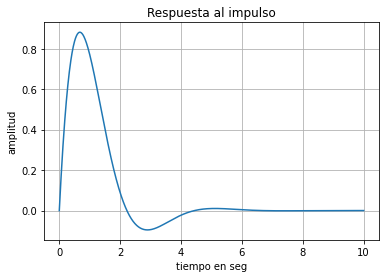

In [37]:
#Vector de tiempo de 0 a 10 segundos
t=np.linspace(0,10,1000)
#Calcula la respuesta al impulso de G1
print(G1)
tiempo, y = co.impulse_response(G1,t)
#Grafica el resultado
plt.plot(t,y)
plt.xlabel('tiempo en seg')
plt.ylabel('amplitud')
plt.title('Respuesta al impulso')
plt.grid()

# Ejercicio 2
Encontrar la respuesta al impulso de G4
\begin{align}
  G_{4}=\frac{3(s+1)}{s^2+7s+9}
\end{align}


   3 s + 3
-------------
s^2 + 7 s + 9



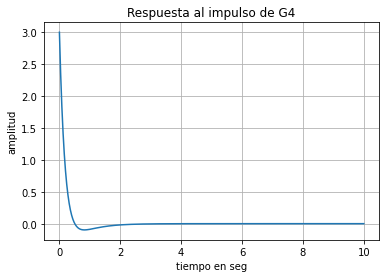

In [38]:
#Vector de tiempo de 0 a 10 segundos
t=np.linspace(0,10,1000)
#Calcula la respuesta al impulso de G4
G4 = co.tf([3,3],[1,7,9])
print(G4)
tiempo, y = co.impulse_response(G4,t)
#Grafica el resultado
plt.plot(t,y)
plt.xlabel('tiempo en seg')
plt.ylabel('amplitud')
plt.title('Respuesta al impulso de G4')
plt.grid()

## Respuesta al Escalon

Encontrar la respuestra ampulso de G1


      3
-------------
s^2 + 2 s + 3



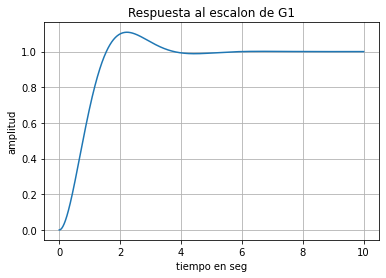

In [40]:
#Vector de tiempo de 0 a 10 segundos
t=np.linspace(0,10,1000)
#Calcula la respuesta al impulso de G1
print(G1)
tiempo, y = co.step_response(G1,t)
#Grafica el resultado
plt.plot(t,y)
plt.xlabel('tiempo en seg')
plt.ylabel('amplitud')
plt.title('Respuesta al escalon de G1')
plt.grid()

# Ejercicio 3
Encontrar la respuesta al impulso de G4
\begin{align}
  G_{5}=\frac{3(s+1)(s+7)}{s^2+10s+1}
\end{align}


3 s^2 + 24 s + 21
-----------------
 s^2 + 10 s + 1



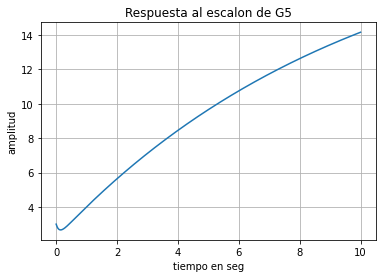

In [41]:
#Vector de tiempo de 0 a 10 segundos
t=np.linspace(0,10,1000)
#Calcula la respuesta al impulso de G5
s=co.tf('s') # La variable de la función de transferencia
G5 = 3*(s+1)*(s+7)/(s**2+10*s+1)
print(G5)
tiempo, y = co.step_response(G5,t)
#Grafica el resultado
plt.plot(t,y)
plt.xlabel('tiempo en seg')
plt.ylabel('amplitud')
plt.title('Respuesta al escalon de G5')
plt.grid()

Ahora vamos a comparar la respuesta al escalón de un sistema de segundo orden
\begin{align}
  G(s)=\frac{𝝎^2_{n}}{s^2+2𝜻𝝎_{n}s+𝝎^2_{n}}
\end{align}

para $𝝎_{n} = 1$ (osea una frecuencia natural de 1 rad/s
y diferentes valores de $𝜻$

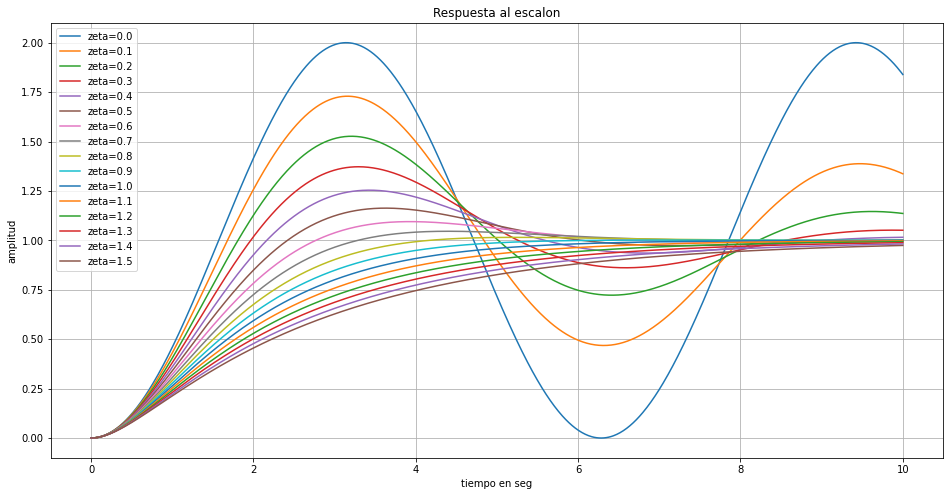

In [46]:
t = np.linspace(0,10,1000)
plt.figure(figsize=(16,8))

for zeta in np.arange(0,1.6,0.1):
  G= co.tf([1],[1,2*zeta,1])
  _, y = co.step_response(G,t)
  plt.plot(t,y,label=f'zeta={zeta:.2}')

plt.xlabel('tiempo en seg')
plt.ylabel('amplitud')
plt.title('Respuesta al escalon')
plt.legend()
plt.grid()

#Respuesta a inputs arbitrarios

Ahora calcularemos la respuesta del sistema G6 cuando se excite con una señal cuadrada lo que sería muy similar a la carga y descarga de un circuito RC

\begin{align}
  G_{6}=\frac{2}{s+2}
\end{align}




  2
-----
s + 2



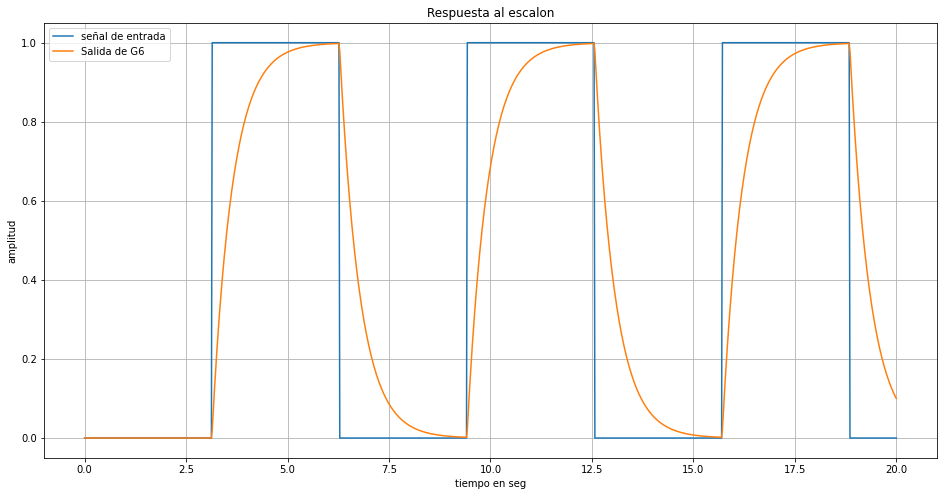

In [57]:
t = np.linspace(0,20,1000)      #vector de tiempo
plt.figure(figsize=(16,8))      #tamaño de la figura

x=np.array(np.sin(t)<0, dtype='float')  #señal de entrada
plt.plot(t,x,label='señal de entrada')

G6 = co.tf([2],[1,2])
print(G6)
#Calcula la respuesta de G6 cuando la entrada es un pulso cuadrado
_,y, = co.forced_response(G6, t, x)

plt.plot(t,y, label='Salida de G6')
plt.xlabel('tiempo en seg')
plt.ylabel('amplitud')
plt.title('Respuesta al escalon')
plt.legend()
plt.grid()

# Ejercicio 4 
Encuentre la respuesta al escalón de G7 cuando es exitado por una señal senoidal $ x(t) = sin(t) $

\begin{align}
  G_{7}=\frac{5}{s+5}
\end{align}



  5
-----
s + 5



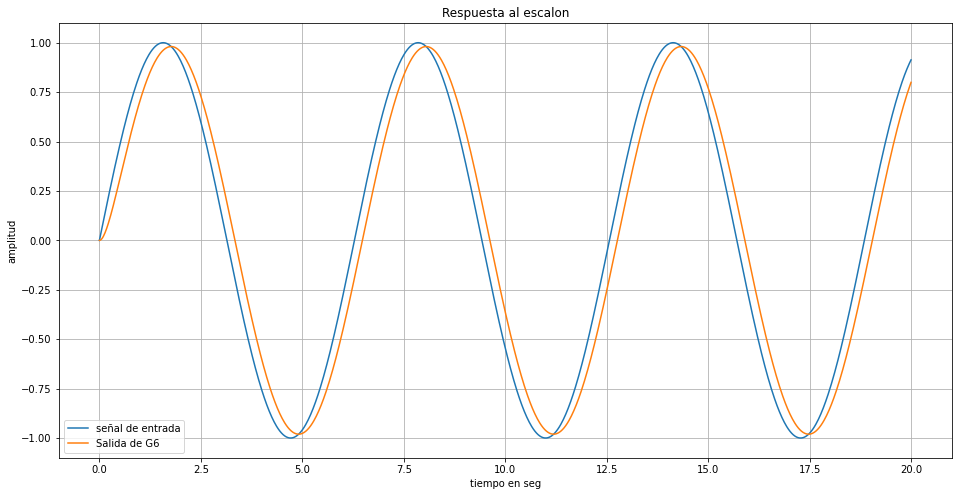

In [58]:
t = np.linspace(0,20,1000)      #vector de tiempo
plt.figure(figsize=(16,8))      #tamaño de la figura

x=np.sin(t)  #señal de entrada
plt.plot(t,x,label='señal de entrada')

G6 = co.tf([5],[1,5])
print(G6)
#Calcula la respuesta de G6 cuando la entrada es un pulso cuadrado
_,y, = co.forced_response(G6, t, x)

plt.plot(t,y, label='Salida de G6')
plt.xlabel('tiempo en seg')
plt.ylabel('amplitud')
plt.title('Respuesta al escalon')
plt.legend()
plt.grid()